In [1]:
# imports
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from matplotlib.animation import FuncAnimation

import cleaner
import filter

In [2]:
data_dict = cleaner.clean_dict(cleaner.load_data())

In [3]:
cleaner.print_structure(data_dict)


  train: 
 	 t_gps: 
 		 PVS 1: (1467, 20)
 		 PVS 2: (1577, 20)
 		 PVS 3: (1341, 20)
 		 PVS 4: (1432, 20)
 		 PVS 5: (1462, 20)
 		 PVS 6: (924, 20)
 		 PVS 7: (1283, 20)
 		 PVS 8: (1254, 20)
 		 PVS 9: (1014, 20)
 	 gps_mpu_left: 
 		 PVS 1: (144036, 32)
 		 PVS 2: (124684, 32)
 		 PVS 3: (105816, 32)
 		 PVS 4: (132492, 32)
 		 PVS 5: (133877, 32)
 		 PVS 6: (96279, 32)
 		 PVS 7: (128548, 32)
 		 PVS 8: (123618, 32)
 		 PVS 9: (91555, 32)
 	 gps_mpu_right: 
 		 PVS 1: (144036, 32)
 		 PVS 2: (124684, 32)
 		 PVS 3: (105816, 32)
 		 PVS 4: (132492, 32)
 		 PVS 5: (133877, 32)
 		 PVS 6: (96279, 32)
 		 PVS 7: (128548, 32)
 		 PVS 8: (123618, 32)
 		 PVS 9: (91555, 32)
 	 labels: 
 		 PVS 1: (144036, 14)
 		 PVS 2: (124684, 14)
 		 PVS 3: (105816, 14)
 		 PVS 4: (132492, 14)
 		 PVS 5: (133877, 14)
 		 PVS 6: (96279, 14)
 		 PVS 7: (128548, 14)
 		 PVS 8: (123618, 14)
 		 PVS 9: (91555, 14)
 	 folders: 9
  val: 
 	 t_gps: <class 'NoneType'>
 	 gps_mpu_left: <class 'NoneType'>
 	 

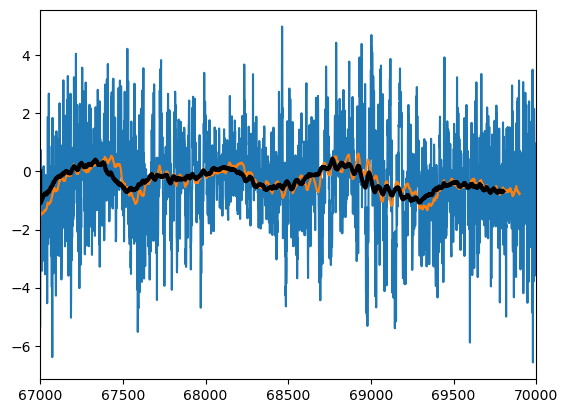

In [4]:
start = 67000
end = 70000
window1 = 20
window2 = 100
window3 = 200
test_data = data_dict["train"]["gps_mpu_right"]["PVS 1"]["acc_x_dashboard"][start:end]

a1 = np.convolve(test_data, np.ones(window1)/window1, mode='valid')
smoothed1 = np.pad(a1, (start, 0), 'constant', constant_values=(0, 0))

a2 = np.convolve(test_data, np.ones(window2)/window2, mode='valid')
smoothed2 = np.pad(a2, (start, 0), 'constant', constant_values=(0, 0))

a3 = np.convolve(test_data, np.ones(window3)/window3, mode='valid')
smoothed3 = np.pad(a3, (start, 0), 'constant', constant_values=(0, 0))

# plot the data
plt.plot(test_data)
# plt.plot(smoothed1)
plt.plot(smoothed2)
plt.plot(smoothed3, linewidth=3, color="black")
plt.xlim((start, end))
plt.show()

In [5]:
def add_smoothed_cols(ddict, window=100, verbose=False, inPlace=True):
    """
    Create a new column for each accelerometer column in the data dictionary with the smoothed data.

    Parameters
    ----------
    ddict : dict
        The data dictionary to be modified.
    window : int
        The window size for the smoothing algorithm.
    verbose : bool
        Whether or not to print out the columns that are being added.
    inPlace : bool
        Whether or not to modify the dictionary in place.

    Returns
    -------
    dict
        The modified data dictionary.
    """
    if not inPlace:
        ddict = ddict.copy()
    for t_type in ddict:
        for csvf in ddict[t_type]:
            try:
                for dir in ddict[t_type][csvf]:
                    for col in ddict[t_type][csvf][dir].columns:
                        if "acc_" in col:
                            d = ddict[t_type][csvf][dir][col]
                            ddict[t_type][csvf][dir][col + "_smooth"] = filter.smooth(d)[:len(d)]
                            if verbose:
                                print("Added", col + "_smooth")
            except TypeError:
                continue
    return ddict

In [ ]:
add_smoothed_cols(data_dict, verbose=True)

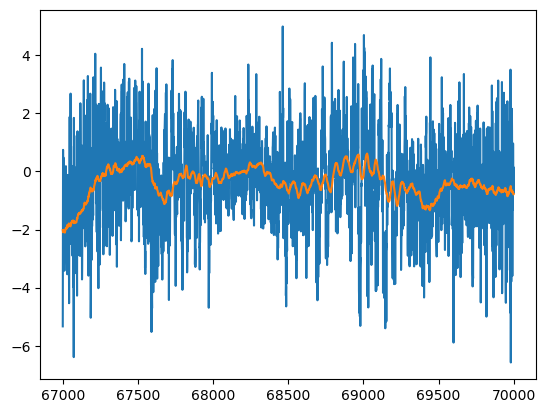

In [8]:
start = 67000
end = 70000

acc_x = data_dict["train"]["gps_mpu_right"]["PVS 1"]["acc_x_dashboard"][start:end]
acc_x_smooth = data_dict["train"]["gps_mpu_right"]["PVS 1"]["acc_x_dashboard_smooth"][start:end]

plt.plot(acc_x)
plt.plot(acc_x_smooth)
plt.show()